## Analysis of the influence of components in a concrete mix on its compressive strength - ML Project

This project is part of my postgraduate diploma on AGH University of Science and Technology.

### Table of contents <a id=0 ></a>
[INTRODUCTION](#18)

1.[Importing necessary libraries](#1)

2.[Data](#2)
* 2.1 [Data source](#3)
* 2.2 [First look at data](#4)
3.[Data cleaning](#19) 
* 3.1 [w/c indicator](#21)
* 3.2 [Cement](#22)
* 3.3 [Water content](#23)
* 3.4 [Additives](#24)
* 3.5 [Aggregate content](#25)
* 3.6 [Slag](#26)
* 3.7 [Filler](#27)
* 3.8 [Compressive strength](#28)
4.[EDA](#5)
* 4.1 [Cement](#6)
* 4.2.[w/c indicator](#7)
* 4.3 [Water](#8)
* 4.4 [Additives](#9)
* 4.5 [Aggregate](#10)
* 4.6 [Fine aggregate](#11)
* 4.7 [Coarse aggregate](#12)
* 4.8 [Slag](#13)
* 4.9 [Filler](#14)
* 4.10 [Compressive strength](#15)
* 4.11 [Sample age](#16)
* 4.12 [Correlation matrix](#17)
5.[Building model](#29)

[CONCLUSIONS](#30)

## INTRODUCTION <a id=18 ></a>

Concrete is an extremely popular material widely used in various building structures around the world. It is estimated that the annual global consumption of concrete exceeds 30 billion tons. The main reasons for the widespread use of concrete are: 

• the possibility of using commonly occurring materials, often local in its production;

• the possibility of recycling (crushing concrete and reusing it as aggregate in a new concrete mix);

• high strength, durability, good thermal properties, fire protection, and high resistance to external factors;

• ease of modifying the composition of the mix, adding environmentally friendly ingredients and additives, that improve the required properties of concrete.

Dynamic development of construction and the emergence of increasingly complex structural objects require modification of the composition of concrete mixes. This causes difficulties in the initial development of the recipe - it becomes increasingly difficult to find a starting point for designing a concrete mix with desired properties. The use of data analysis tools seems to be an ideal solution to this problem. By utilizing the possibilities offered by data analysis, machine learning and data science, it is possible to quickly and transparently understand the relationships between individual components of a concrete mix, analyze their impact on the properties of concrete and develop an optimal mix in a shorter time. Due to the cost and time-consuming nature of testing concrete samples, the use of data analysis and machine learning to search for relationships and optimize concrete mixes recepies seems to be cost-effective and justified. With the appropriate database and analytical skills, construction engineers can maximize the potential inherent in concrete. Of course, the process of achieving concrete strength is much more complex - the key is the care of concrete in the initial phase of its setting (properly moisturizing concrete, preventing "concrete freezing" etc.).

The aim of this work is to conduct an analysis of the impact of the composition of a concrete mix on its compressive strength, identify potential errors during concrete production and maintenance, and build a machine learning model that predicts the compressive strength of concrete based on its composition.

## 1. Importing necessary libraries <a id=1 ></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xlrd
import sqlite3
import numpy as np

In [2]:
pd.options.display.max_columns = None

pd.options.display.float_format = '{:.2f}'.format

pd.options.display.max_rows = None

## 2. Data <a id=2></a>

### 2.1. Data source <a id=3></a>

Final data base includes three data bases:
1. https://www.kaggle.com/datasets/sinamhd9/concrete-comprehensive-strength
2. https://data.mendeley.com/datasets/gp2nvxn6zg/1
3. https://www.sciencedirect.com/science/article/pii/S2352710222012992

I give all credits to the authors. 

Please keep in mind that data were unified and combined into one table by me. To do so I made some changes like deleting unmatched columns, duplicated rows etc. in original data sets. So final data set used by me may differ from original records in mentioned data sources.

### 2.2. First look at data <a id=4></a>

Let's take a look at all three tables and its content.

In [3]:
df= pd.read_excel('dane_repo.xlsx',sheet_name='polaczone')

In [4]:
df.head()

,Lp,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age,Unnamed: 12
0,1,540.00,0.30,162.00,2.50,1716.00,676.00,1040.00,0.00,0.00,79.99,28,NaN
1,2,540.00,0.30,162.00,2.50,1731.00,676.00,1055.00,0.00,0.00,61.89,28,NaN
2,3,332.50,0.69,228.00,0.00,1526.00,594.00,932.00,142.50,0.00,40.27,270,NaN
3,4,332.50,0.69,228.00,0.00,1526.00,594.00,932.00,142.50,0.00,41.05,365,NaN
4,5,198.60,0.97,192.00,0.00,1803.90,825.50,978.40,132.40,0.00,44.30,360,NaN


In [5]:
del df['Lp']
del df['Unnamed: 12']

In [6]:
df.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00
mean,353.32,0.54,178.85,3.67,1821.55,707.49,1114.06,13.58,20.39,40.41,25.41
std,71.72,0.19,19.22,5.13,109.41,101.16,129.56,46.76,41.40,15.77,41.39
min,102.00,0.24,110.00,0.00,1200.00,275.00,468.00,0.00,0.00,2.33,1.00
25%,340.00,0.46,165.75,0.00,1787.99,665.00,1044.00,0.00,0.00,31.58,7.00
50%,360.00,0.50,178.85,3.00,1860.00,715.00,1140.00,0.00,0.00,38.30,7.00
75%,375.00,0.54,189.00,4.40,1885.00,769.47,1185.00,0.00,0.00,46.18,28.00
max,783.00,1.88,255.00,72.60,2057.13,1193.00,1510.00,359.40,200.10,143.78,365.00


Data includes following informations:
* cement(kg/$m^{3}$ mix) - portland cement content in 1$m^{3}$ of concrete mix;
* W/C_eff - water-cement indicator, contains a ratio between the amount of water and cement in concrete mix;
* Water(kg/$m^{3}$ mix) - water content in a concrete mix;
* Additives(kg/$m^{3}$ mix) - additives content in a concrete mix;
* Aggregate(kg/$m^{3}$ mix) - fine and coarse aggregate content combined;
* Fine_aggregate(kg/$m^{3}$ mix) - fine aggregate content in concrete mix;
* Coarse_aggregate(kg/$m^{3}$ mix) - coarse aggregate content in concrete mix;
* Slag(kg/$m^{3}$ mix) - slag content;
* Filler(kg/$m^{3}$ mix) - filler content (fly ashes or rice husk);
* Compr_str(MPa) - concrete compressive strength in MPa;
* Age(days) - age of sample.

## 3. Data cleaning <a id=19></a>

In [7]:
df.columns

Index(['Cement', 'W/C_eff', 'Water', 'Additives', 'Aggregate',
       'Fine_aggregate', 'Coarse_aggregate', 'Slag', 'Filler', 'Compr_str',
       'Age'],
      dtype='object')

Firstly, let's take a look at missing and uncorrect values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5604 entries, 0 to 5603
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            5604 non-null   float64
 1   W/C_eff           5604 non-null   float64
 2   Water             5604 non-null   float64
 3   Additives         5604 non-null   float64
 4   Aggregate         5604 non-null   float64
 5   Fine_aggregate    5604 non-null   float64
 6   Coarse_aggregate  5604 non-null   float64
 7   Slag              5604 non-null   float64
 8   Filler            5604 non-null   float64
 9   Compr_str         5604 non-null   float64
 10  Age               5604 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 481.7 KB


In [9]:
df.isnull().sum()

Cement              0
W/C_eff             0
Water               0
Additives           0
Aggregate           0
Fine_aggregate      0
Coarse_aggregate    0
Slag                0
Filler              0
Compr_str           0
Age                 0
dtype: int64

There are no missing or null values.

Dealing with outliers.

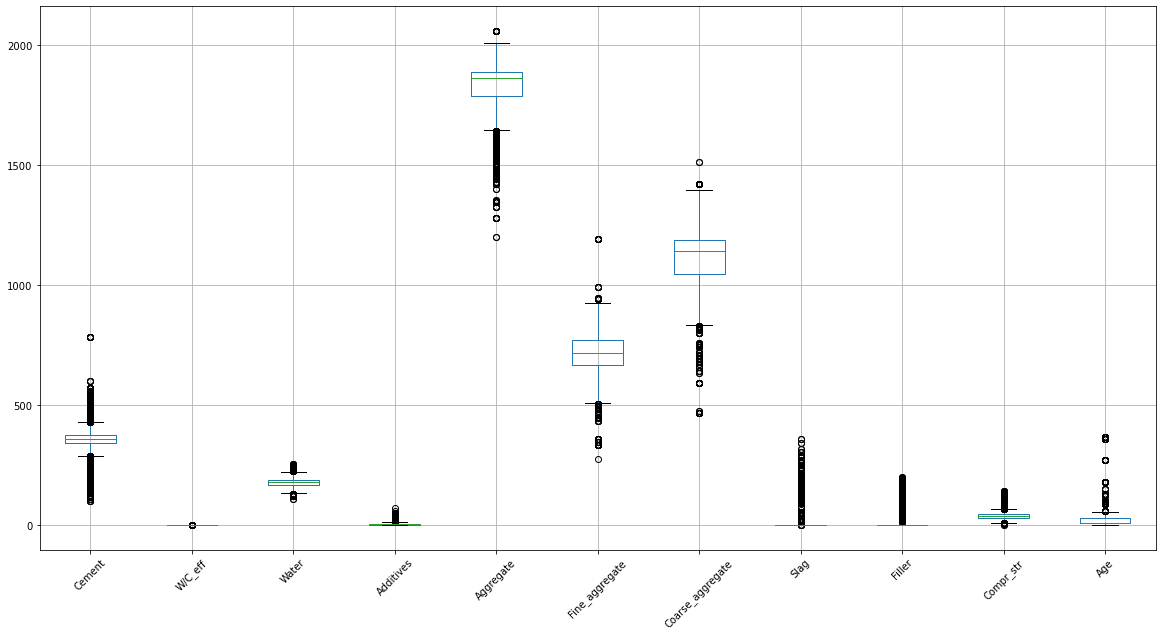

In [10]:
df.boxplot(column = ['Cement', 'W/C_eff', 'Water', 'Additives', 'Aggregate',
       'Fine_aggregate', 'Coarse_aggregate', 'Slag', 'Filler', 'Compr_str',
       'Age'], rot=45, figsize = (20,10));

There are many outliers in data set. Let's check every attribute separately and decide, whether or not we should delete it. To do so, we need function calculating IQR.

In [11]:
def IQR_calc(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    print("Q3 value for column %s is: %s" %(col,Q3))
    print("Q1 value for column %s is: %s" %(col,Q1))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    print(f"Lower range is {lower_range}, upper range is {upper_range}")

Let's copy data frame to create outliers-free data frame

In [12]:
df_correction = df.copy(deep=True)

In [13]:
df.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00
mean,353.32,0.54,178.85,3.67,1821.55,707.49,1114.06,13.58,20.39,40.41,25.41
std,71.72,0.19,19.22,5.13,109.41,101.16,129.56,46.76,41.40,15.77,41.39
min,102.00,0.24,110.00,0.00,1200.00,275.00,468.00,0.00,0.00,2.33,1.00
25%,340.00,0.46,165.75,0.00,1787.99,665.00,1044.00,0.00,0.00,31.58,7.00
50%,360.00,0.50,178.85,3.00,1860.00,715.00,1140.00,0.00,0.00,38.30,7.00
75%,375.00,0.54,189.00,4.40,1885.00,769.47,1185.00,0.00,0.00,46.18,28.00
max,783.00,1.88,255.00,72.60,2057.13,1193.00,1510.00,359.40,200.10,143.78,365.00


In [14]:
df_correction.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00,5604.00
mean,353.32,0.54,178.85,3.67,1821.55,707.49,1114.06,13.58,20.39,40.41,25.41
std,71.72,0.19,19.22,5.13,109.41,101.16,129.56,46.76,41.40,15.77,41.39
min,102.00,0.24,110.00,0.00,1200.00,275.00,468.00,0.00,0.00,2.33,1.00
25%,340.00,0.46,165.75,0.00,1787.99,665.00,1044.00,0.00,0.00,31.58,7.00
50%,360.00,0.50,178.85,3.00,1860.00,715.00,1140.00,0.00,0.00,38.30,7.00
75%,375.00,0.54,189.00,4.40,1885.00,769.47,1185.00,0.00,0.00,46.18,28.00
max,783.00,1.88,255.00,72.60,2057.13,1193.00,1510.00,359.40,200.10,143.78,365.00


### 3.1 w/c indicator<a id=21></a>

In [15]:
IQR_calc(df_correction,"W/C_eff")

IQR value for column W/C_eff is: 0.07571428571428568
Q3 value for column W/C_eff is: 0.5357142857142857
Q1 value for column W/C_eff is: 0.46
Lower range is 0.34642857142857153, upper range is 0.6492857142857142


Analyzing the interquartile range of the w/c ratio, it can be assumed that all values of this attribute above 0.65 are outliers. Due to the nature of this parameter and the different properties of the analyzed samples, it was decided to reject values above 1. In addition, it was decided not to remove values below the lower limit from the dataset.

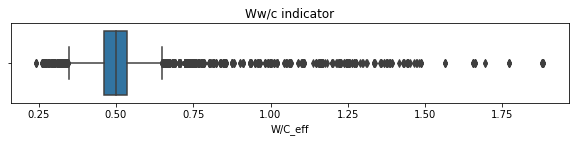

In [16]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Ww/c indicator")
sns.boxplot(x=df_correction['W/C_eff'])
plt.show()

In [17]:
high_wc = df_correction[df_correction['W/C_eff']>1]

In [19]:
high_wc.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,230.00,230.00,230.00,230.00,230.00,230.00,230.00,230.00,230.00,230.00,230.00
mean,157.88,1.28,197.97,5.13,1732.92,755.02,977.90,121.79,79.59,25.58,35.94
std,24.19,0.21,23.97,5.25,91.05,85.55,101.49,88.11,69.51,11.59,44.00
min,102.00,1.01,158.00,0.00,1457.00,580.00,814.00,0.00,0.00,2.33,3.00
25%,144.00,1.11,179.94,0.00,1689.12,692.60,900.95,0.00,0.00,15.61,28.00
50%,155.00,1.23,192.00,4.49,1750.00,748.50,960.10,144.45,101.00,26.15,28.00
75%,167.26,1.38,203.50,9.00,1802.90,814.92,1026.60,189.50,134.00,33.31,28.00
max,237.00,1.88,255.00,19.00,1870.00,943.10,1180.00,272.80,200.10,55.02,365.00


In [20]:
df_correction_after_wc = df_correction.loc[(df_correction['W/C_eff']>1)]
indexes = df_correction_after_wc.index
df_correction.drop(indexes,axis=0,inplace=True)
df_correction.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,5374.00,5374.00,5374.00,5374.00,5374.00,5374.00,5374.00,5374.00,5374.00,5374.00,5374.00
mean,361.69,0.51,178.03,3.61,1825.34,705.45,1119.89,8.95,17.86,41.04,24.96
std,60.28,0.11,18.56,5.12,108.53,101.29,127.43,37.77,37.75,15.62,41.21
min,165.00,0.24,110.00,0.00,1200.00,275.00,468.00,0.00,0.00,2.35,1.00
25%,350.00,0.45,165.60,0.00,1805.00,660.00,1055.00,0.00,0.00,32.03,7.00
50%,365.00,0.49,178.50,3.00,1865.00,715.00,1145.00,0.00,0.00,38.76,7.00
75%,375.00,0.53,189.00,4.26,1890.00,765.00,1190.00,0.00,0.00,46.63,28.00
max,783.00,1.00,240.00,72.60,2057.13,1193.00,1510.00,359.40,174.74,143.78,365.00


230 records with w/c indicator greater than 1 was removed.

### 3.2. Cement <a id=22></a>

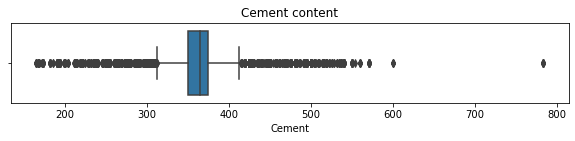

In [21]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Cement content")
sns.boxplot(x=df_correction['Cement'])
plt.show()

In [22]:
IQR_calc(df_correction,"Cement")

IQR value for column Cement is: 25.0
Q3 value for column Cement is: 375.0
Q1 value for column Cement is: 350.0
Lower range is 312.5, upper range is 412.5


In [23]:
low_cement = df_correction.loc[(df_correction['Cement']<140) | (df_correction['Cement']>600)]

In [24]:
low_cement.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00
mean,783.00,0.27,212.00,3.60,1277.00,344.00,933.00,0.00,87.00,62.00,28.57
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.49,33.52
min,783.00,0.27,212.00,3.60,1277.00,344.00,933.00,0.00,87.00,41.00,1.00
25%,783.00,0.27,212.00,3.60,1277.00,344.00,933.00,0.00,87.00,60.50,5.00
50%,783.00,0.27,212.00,3.60,1277.00,344.00,933.00,0.00,87.00,63.00,14.00
75%,783.00,0.27,212.00,3.60,1277.00,344.00,933.00,0.00,87.00,67.50,42.00
max,783.00,0.27,212.00,3.60,1277.00,344.00,933.00,0.00,87.00,74.00,91.00


In [25]:
list_of_indexes = low_cement.index

In [26]:
df_correction.drop(list_of_indexes,axis=0,inplace=True)

In [27]:
df_correction.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,5367.00,5367.00,5367.00,5367.00,5367.00,5367.00,5367.00,5367.00,5367.00,5367.00,5367.00
mean,361.14,0.51,177.99,3.61,1826.06,705.92,1120.14,8.96,17.77,41.01,24.96
std,58.36,0.11,18.53,5.12,106.78,100.51,127.33,37.79,37.70,15.61,41.23
min,165.00,0.24,110.00,0.00,1200.00,275.00,468.00,0.00,0.00,2.35,1.00
25%,350.00,0.45,165.60,0.00,1805.00,660.00,1055.00,0.00,0.00,32.03,7.00
50%,365.00,0.49,178.50,3.00,1865.00,715.00,1145.00,0.00,0.00,38.76,7.00
75%,375.00,0.53,189.00,4.27,1890.00,765.00,1190.00,0.00,0.00,46.63,28.00
max,600.00,1.00,240.00,72.60,2057.13,1193.00,1510.00,359.40,174.74,143.78,365.00


7 records with cement content over 600 and below 140 kg were dropped from data.

In [29]:
IQR_calc(df_correction,"Cement")

IQR value for column Cement is: 25.0
Q3 value for column Cement is: 375.0
Q1 value for column Cement is: 350.0
Lower range is 312.5, upper range is 412.5


### 3.3. Water content <a id=23></a>

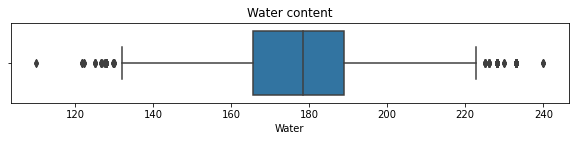

In [30]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Water content")
sns.boxplot(x=df_correction['Water'])
plt.show()

In [31]:
IQR_calc(df_correction,"Water")

IQR value for column Water is: 23.400000000000006
Q3 value for column Water is: 189.0
Q1 value for column Water is: 165.6
Lower range is 130.5, upper range is 224.10000000000002


In [32]:
df_correction['Water'].value_counts()

180.00    495
175.00    240
191.25    194
178.50    179
183.75    175
189.00    170
165.00    139
164.50    102
185.50    100
192.00    100
170.00     98
168.00     92
168.75     91
161.00     78
165.60     69
171.50     68
190.00     68
210.00     58
189.80     55
171.55     55
164.25     54
162.00     54
228.00     54
176.25     51
153.00     49
207.00     48
160.60     46
160.00     45
154.00     44
233.00     42
186.15     39
185.70     38
202.99     36
176.00     36
222.86     36
212.00     36
191.00     36
178.00     34
170.20     33
175.20     32
186.00     32
159.80     31
166.60     30
159.25     30
185.00     29
150.00     29
184.50     27
158.40     27
201.00     27
157.00     26
145.00     26
166.00     25
180.60     25
128.00     24
172.50     24
216.00     24
161.25     23
178.85     23
205.00     22
190.40     22
183.60     21
188.70     21
180.95     21
164.90     20
137.00     20
174.20     20
200.00     19
182.00     19
138.00     19
193.45     19
144.00     18
162.50

No records were removed.

### 3.4. Additives <a id=24></a>

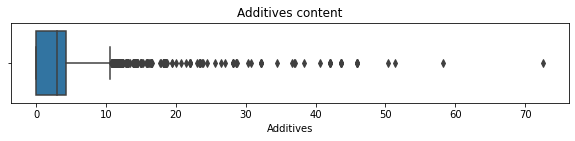

In [33]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Additives content")
sns.boxplot(x=df_correction['Additives'])
plt.show()

In [34]:
IQR_calc(df_correction,"Additives")

IQR value for column Additives is: 4.27
Q3 value for column Additives is: 4.27
Q1 value for column Additives is: 0.0
Lower range is -6.404999999999999, upper range is 10.674999999999999


The contents of additives can vary greatly in value, due to their numerous types and purposes. Therefore, it is important not to remove any of the records, as the available data does not specify the exact purpose and type of additive used.

### 3.5. Aggregate content <a id=25></a>

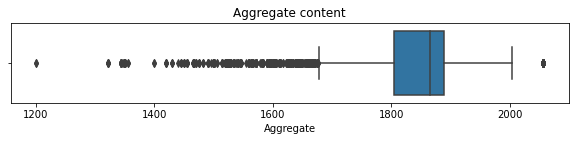

In [35]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Aggregate content")
sns.boxplot(x=df_correction['Aggregate'])
plt.show()

In [36]:
IQR_calc(df_correction,"Aggregate")

IQR value for column Aggregate is: 85.0
Q3 value for column Aggregate is: 1890.0
Q1 value for column Aggregate is: 1805.0
Lower range is 1677.5, upper range is 2017.5


In [37]:
df_correction.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,5367.00,5367.00,5367.00,5367.00,5367.00,5367.00,5367.00,5367.00,5367.00,5367.00,5367.00
mean,361.14,0.51,177.99,3.61,1826.06,705.92,1120.14,8.96,17.77,41.01,24.96
std,58.36,0.11,18.53,5.12,106.78,100.51,127.33,37.79,37.70,15.61,41.23
min,165.00,0.24,110.00,0.00,1200.00,275.00,468.00,0.00,0.00,2.35,1.00
25%,350.00,0.45,165.60,0.00,1805.00,660.00,1055.00,0.00,0.00,32.03,7.00
50%,365.00,0.49,178.50,3.00,1865.00,715.00,1145.00,0.00,0.00,38.76,7.00
75%,375.00,0.53,189.00,4.27,1890.00,765.00,1190.00,0.00,0.00,46.63,28.00
max,600.00,1.00,240.00,72.60,2057.13,1193.00,1510.00,359.40,174.74,143.78,365.00


In [38]:
coarse_outliers = df_correction.loc[(df_correction['Aggregate']<1677.5) | (df_correction['Aggregate']>2017.5)]

In [39]:
coarse_outliers.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,537.00,537.00,537.00,537.00,537.00,537.00,537.00,537.00,537.00,537.00,537.00
mean,386.23,0.52,189.90,5.00,1596.65,650.43,946.22,40.32,43.27,49.39,45.89
std,87.39,0.16,25.69,8.11,151.86,142.50,180.56,79.59,48.49,22.44,64.51
min,192.00,0.26,122.40,0.00,1200.00,275.00,468.00,0.00,0.00,5.87,1.00
25%,323.70,0.40,177.60,0.00,1526.00,582.00,861.00,0.00,0.00,34.53,7.00
50%,380.00,0.50,186.00,2.51,1593.60,664.30,933.00,0.00,30.30,43.73,28.00
75%,457.00,0.61,214.00,8.00,1645.00,737.00,1025.00,26.00,80.00,57.22,56.00
max,600.00,1.00,228.00,72.60,2057.13,1193.00,1371.42,359.40,171.00,135.28,365.00


Due to the nature of the analyzed data, outliers were not removed - the contents of the aggregate may vary significantly, and their removal based on deviating from the rest of the data may result in the loss of valuable information.

### 3.6. Slag <a id=26></a>

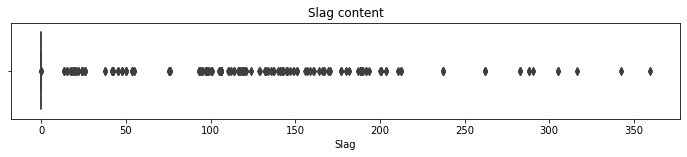

In [40]:
plt.figure(figsize= (12,6))
plt.subplot(3,1,1)
plt.title("Slag content")
sns.boxplot(x=df_correction['Slag'])
plt.show()

In [41]:
IQR_calc(df_correction,"Slag")

IQR value for column Slag is: 0.0
Q3 value for column Slag is: 0.0
Q1 value for column Slag is: 0.0
Lower range is 0.0, upper range is 0.0


In [42]:
slag = df_correction[df_correction['Slag']>0]

In [43]:
slag.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00,399.00
mean,312.47,0.62,176.48,8.03,1703.43,754.28,949.15,120.55,43.35,44.26,46.44
std,90.38,0.21,24.98,6.46,98.22,83.48,72.36,75.96,59.86,16.89,64.96
min,165.00,0.29,121.75,0.00,1521.00,594.00,811.00,0.02,0.00,6.81,3.00
25%,236.75,0.42,157.45,0.00,1630.00,699.00,907.95,51.92,0.00,33.40,7.00
50%,313.30,0.59,174.00,8.60,1700.50,755.80,944.70,114.00,0.00,43.57,28.00
75%,383.50,0.79,192.00,11.60,1780.40,801.00,999.85,177.00,94.00,55.90,56.00
max,491.00,1.00,228.00,32.20,1906.50,992.60,1145.00,359.40,173.53,82.60,365.00


Slag was added only in 399 records. With that in mind, this attribute shouldn't be used in building ML model due to insufficient data. 

### 3.7. Filler <a id=27></a>

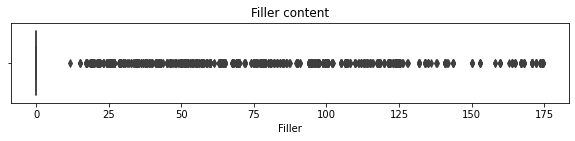

In [44]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Filler content")
sns.boxplot(x=df_correction['Filler'])
plt.show()

In [45]:
IQR_calc(df_correction,"Filler")

IQR value for column Filler is: 0.0
Q3 value for column Filler is: 0.0
Q1 value for column Filler is: 0.0
Lower range is 0.0, upper range is 0.0


In [46]:
filler = df_correction[df_correction['Filler']>0]

In [47]:
filler.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,1249.00,1249.00,1249.00,1249.00,1249.00,1249.00,1249.00,1249.00,1249.00,1249.00,1249.00
mean,346.46,0.55,176.91,5.50,1759.17,672.75,1086.42,7.15,76.35,46.91,38.02
std,89.63,0.17,26.19,7.92,130.44,145.92,173.57,24.15,40.41,24.32,49.59
min,165.00,0.26,121.75,0.00,1322.30,332.00,468.00,0.00,11.63,2.35,1.00
25%,280.00,0.40,157.40,0.00,1690.00,560.00,968.00,0.00,42.50,30.39,7.00
50%,353.81,0.53,170.30,3.70,1783.00,685.71,1050.00,0.00,71.70,42.00,28.00
75%,403.75,0.67,196.00,8.30,1863.00,780.65,1189.50,0.00,102.00,56.85,56.00
max,553.80,1.00,233.00,72.60,2057.13,1193.00,1419.00,180.00,174.74,143.78,365.00


Filler was used only in 1249 records.

### 3.8. Compressive strength <a id=28></a>

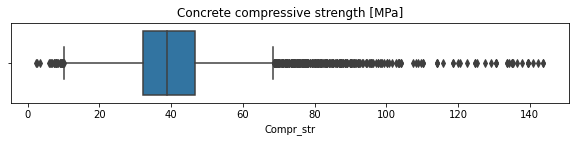

In [48]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Concrete compressive strength [MPa]")
sns.boxplot(x=df_correction['Compr_str'])
plt.show()

In [49]:
IQR_calc(df_correction,"Compr_str")

IQR value for column Compr_str is: 14.591999999999999
Q3 value for column Compr_str is: 46.626
Q1 value for column Compr_str is: 32.034
Lower range is 10.146, upper range is 68.514


In [50]:
cs_outliers = df_correction.loc[(df_correction['Compr_str']>115)]
cs_outliers

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
1863,466.40,0.33,153.20,13.10,1688.00,645.00,1043.00,0.00,47.10,125.18,28
1864,458.90,0.33,152.10,16.20,1682.70,644.80,1037.90,0.00,50.70,122.40,28
1865,461.70,0.33,150.10,13.40,1704.70,656.40,1048.30,0.00,41.40,119.97,28
1873,490.40,0.30,146.40,19.40,1675.80,629.60,1046.20,0.00,46.20,124.68,28
1874,480.90,0.30,144.80,23.00,1666.40,628.60,1037.80,0.00,50.10,118.47,28
1882,515.00,0.27,140.00,28.60,1657.90,612.50,1045.40,0.00,45.10,134.32,28
1884,509.80,0.27,137.20,30.70,1656.90,617.00,1039.90,0.00,39.10,135.28,28
2054,356.00,0.50,178.00,9.68,1544.00,612.00,932.00,0.00,153.00,120.60,28
2055,356.00,0.50,178.00,9.68,1544.00,612.00,932.00,0.00,153.00,129.25,90
2063,540.00,0.33,180.00,7.56,1499.00,579.00,920.00,0.00,60.00,118.69,90


In [51]:
list_of_indexes = cs_outliers.index

In [52]:
df_correction.drop(list_of_indexes,axis=0,inplace=True)

31 records were removed due to almost impossibly high compressive strength.

[Go back to table of contents](#0)

## 4. EDA <a id=5></a>

### 4.1. Cement <a id=6></a>

In [53]:
df_correction['Cement'].describe(include=all)

count   5336.00
mean     360.49
std       57.73
min      165.00
25%      350.00
50%      364.00
75%      375.00
max      600.00
Name: Cement, dtype: float64

Mean contnet of cement in concrete mix equals 360,49 kg/$m^{3}$. Min value is 165 kg, median is 364, max value is 600 kg/$m^{3}$.

<AxesSubplot:xlabel='Cement', ylabel='Count'>

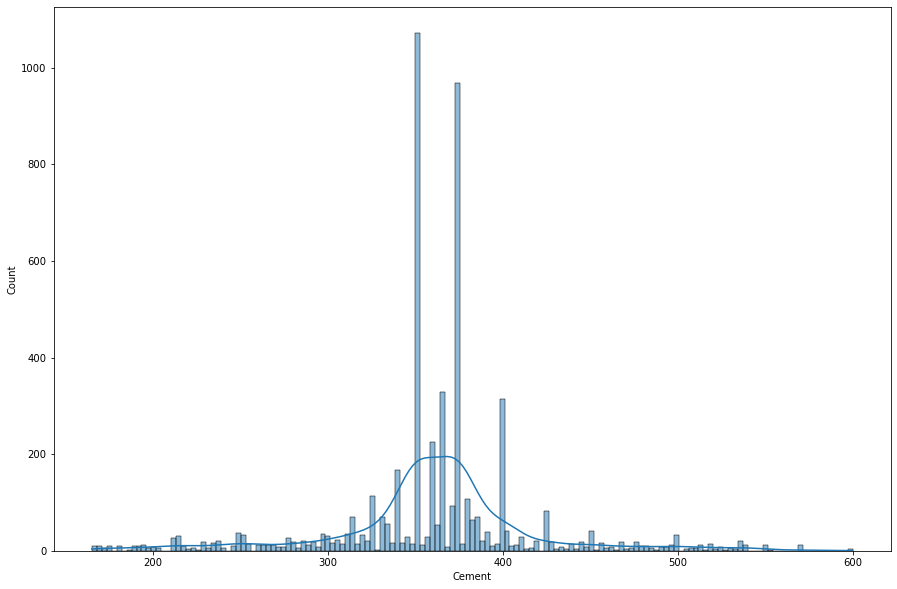

In [54]:
plt.figure(figsize= (15,10))
sns.histplot(df_correction['Cement'],kde=True)

The above histogram shows the distribution of the attribute of cement content. Analyzing the cement content attribute in the concrete mix, it can be stated that:

• the most common value is 350 kg/$m^{3}$ - occurring in the dataset 1066 times. The second value - 375 kg/$m^{3}$ occurs 962 times;

• the mean value is 360.49 kg/$m^{3}$;

• the median is 364 kg/$m^{3}$;

• the standard deviation is 57.73 kg/$m^{3}$.

The vast majority of values contains in range 300-400 kg/$m^{3}$, which is a correct observation considering that such cement contents are typical in commercial and structural usage. The left side of the chart presents weaker concrete, with low cement content (e.g. concrete used in single-family houses as screeds, etc.), while the right side represents structural concrete, used, for example, in bridge and road construction. The median is close to the mean, indicating a symmetric distribution. The distribution of avalues is highly dominated by two values corresponding to the highest bars on the chart. Additionally, there are five more frequencies (corresponding to five =higher bars in the central part of the chart), while the remaining values are significantly smaller and irregularly distributed in considered range.

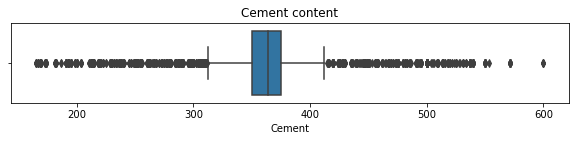

In [55]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Cement content")
sns.boxplot(x=df_correction['Cement'])
plt.show()

In [56]:
IQR_calc(df_correction,"Cement")

IQR value for column Cement is: 25.0
Q3 value for column Cement is: 375.0
Q1 value for column Cement is: 350.0
Lower range is 312.5, upper range is 412.5


[Go back to table of contents](#0)

### 4.2. w/c indicator <a id=7></a>

In [57]:
df_correction['W/C_eff'].describe(include=all)

count   5336.00
mean       0.51
std        0.11
min        0.24
25%        0.46
50%        0.49
75%        0.53
max        1.00
Name: W/C_eff, dtype: float64

<AxesSubplot:xlabel='W/C_eff', ylabel='Count'>

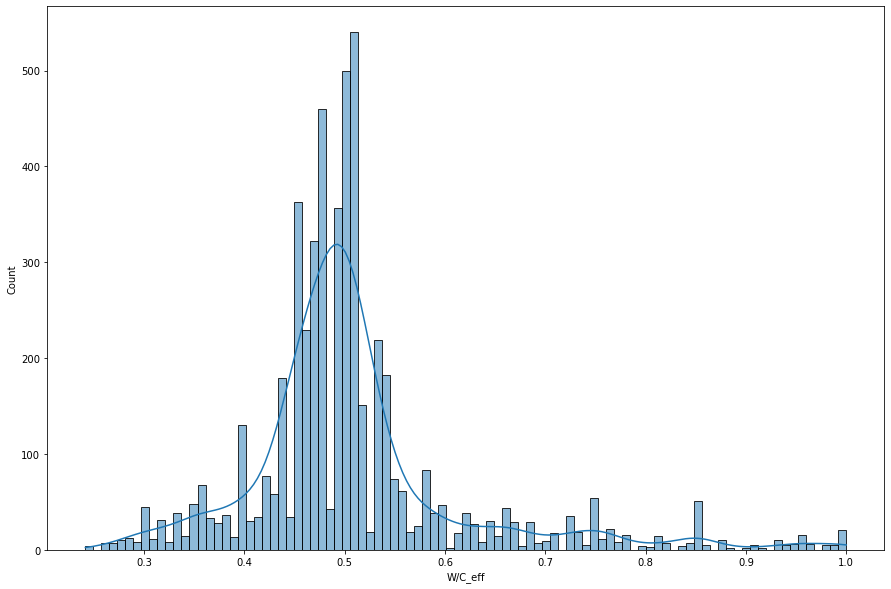

In [58]:
plt.figure(figsize= (15,10))
sns.histplot(df_correction['W/C_eff'],kde=True)

Analyzing the above histogram, it can be stated that:

• the most values are contained in the range of 0.48-0.51 - occurring in the dataset 1810 times;

• the mean value is 0.51;

• the median is 0.49;

• the standard deviation is 0.11.

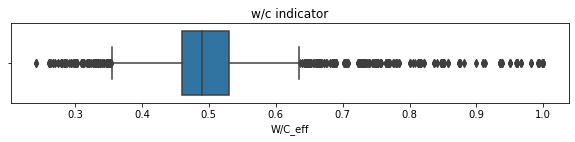

In [59]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("w/c indicator")
sns.boxplot(x=df_correction['W/C_eff'])
plt.show()

[Go back to table of contents](#0)

### 4.3. Water <a id=8></a>

In [60]:
df_correction['Water'].describe(include=all)

count   5336.00
mean     178.13
std       18.47
min      110.00
25%      165.60
50%      178.50
75%      189.00
max      240.00
Name: Water, dtype: float64

<AxesSubplot:xlabel='Water', ylabel='Count'>

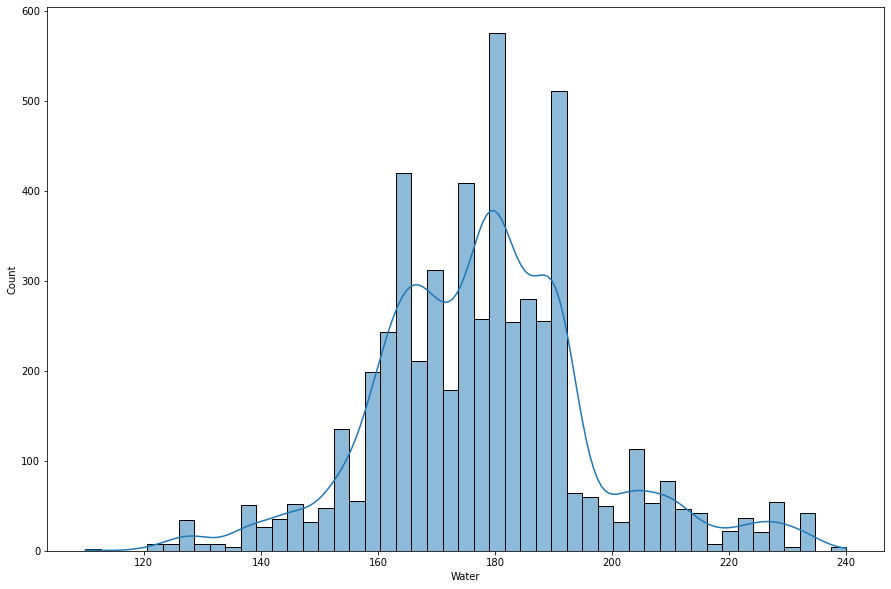

In [61]:
plt.figure(figsize= (15,10))
sns.histplot(df_correction['Water'],kde=True)

Based on the above chart, it can be stated that:

• the most common value is 180 kg/$m^{3}$ - occurring in the dataset 495 times. The second value - 175 kg/m3 occurs 240 times;

• the mean value is 178.13 kg/$m^{3}$;

• the median is 178.50 kg/$m^{3}$;

• the standard deviation is 18.47 kg/$m^{3}$.

The median is almost equal to the mean value, which indicates a symmetrical distribution of the attribute. The standard deviation represents about 10% of the mean value. This indicates a concentration of values around the mean (and median).

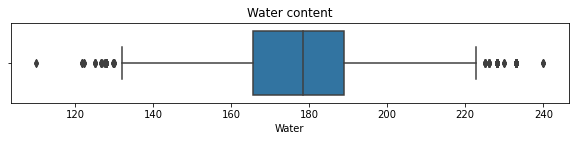

In [62]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Water content")
sns.boxplot(x=df_correction['Water'])
plt.show()

In [63]:
IQR_calc(df_correction,"Water")

IQR value for column Water is: 23.400000000000006
Q3 value for column Water is: 189.0
Q1 value for column Water is: 165.6
Lower range is 130.5, upper range is 224.10000000000002


[Go back to table of contents](#0)

### 4.4. Additives <a id=9></a>

In [64]:
df_correction['Additives'].describe(include=all)

count   5336.00
mean       3.57
std        5.08
min        0.00
25%        0.00
50%        3.00
75%        4.23
max       72.60
Name: Additives, dtype: float64

<AxesSubplot:xlabel='Additives', ylabel='Count'>

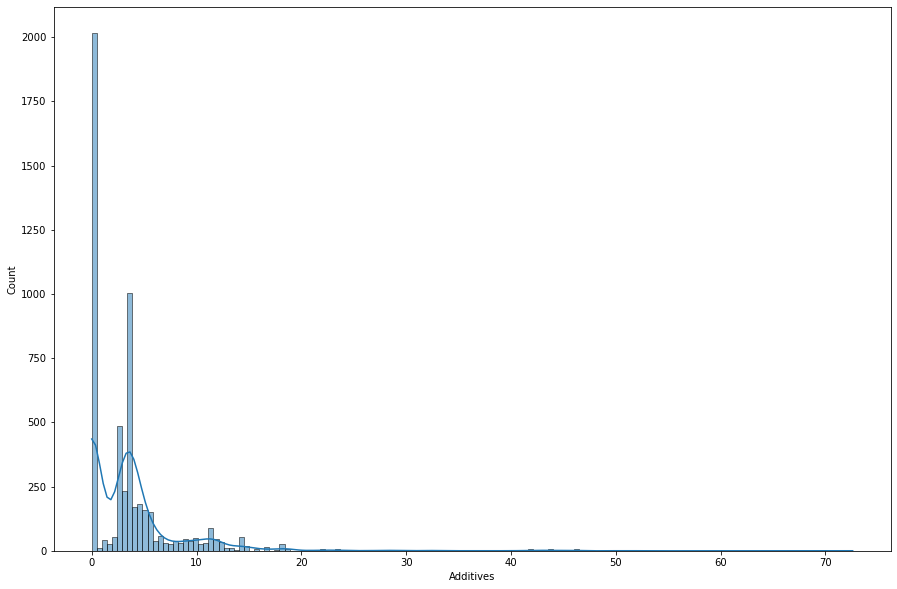

In [65]:
plt.figure(figsize= (15,10))
sns.histplot(df_correction['Additives'],kde=True)

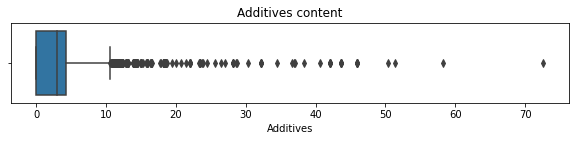

In [66]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Additives content")
sns.boxplot(x=df_correction['Additives'])
plt.show()

The content of additives is a numerical, continuous value. Due to different types of samples in the analyzed dataset, not every sample contained additives and plasticizers. Large variations in the content of additives come directly from their specificity. Each concrete admixture has different properties and different manufacturer recommendations. In addition, the use of additives in concrete mix is not mandatory and depends on specific requirements.

[Go back to table of contents](#0)

### 4.5. Aggregate <a id=10></a>

In [67]:
df_correction['Aggregate'].describe(include=all)

count   5336.00
mean    1826.92
std      106.36
min     1200.00
25%     1805.00
50%     1865.00
75%     1890.00
max     2057.13
Name: Aggregate, dtype: float64

In [68]:
IQR_calc(df_correction,"Aggregate")

IQR value for column Aggregate is: 85.0
Q3 value for column Aggregate is: 1890.0
Q1 value for column Aggregate is: 1805.0
Lower range is 1677.5, upper range is 2017.5


Aggregate is responsible for filling the empty spaces in the concrete mix and creating the load-bearing skeleton. Its quantity depends on the designed strength of the concrete and its purpose. Various contents of the aggregate are permissible. Therefore, there are many outliers in this attribute, but they may carry important information about the strength of the concrete. The histogram below shows the quantitative distribution of the aggregate content in the concrete mix.

<AxesSubplot:xlabel='Aggregate', ylabel='Count'>

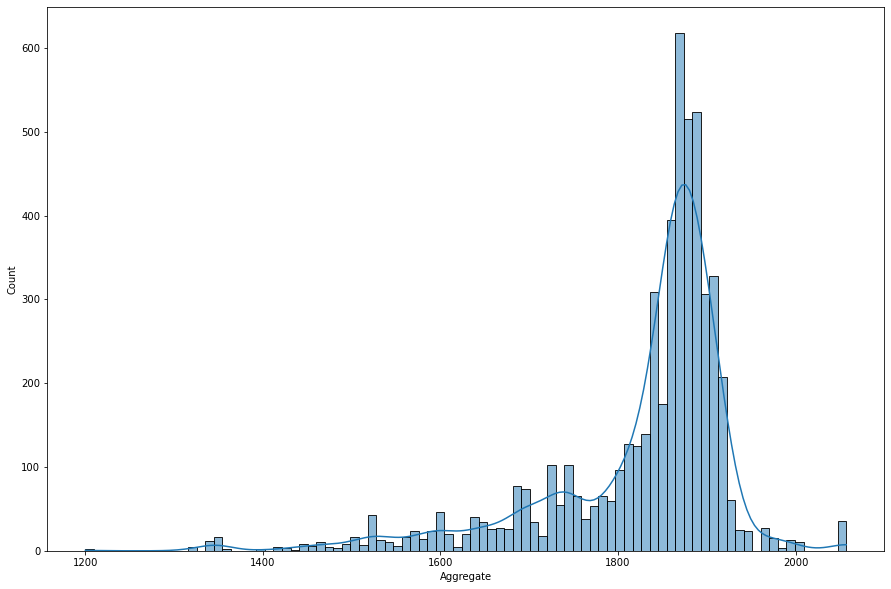

In [69]:
plt.figure(figsize= (15,10))
sns.histplot(df_correction['Aggregate'],kde=True)

The distribution of aggregate content is left-skewed, with rather large amounts of aggregate. Its mean content is 1827 kg/$m^{3}$, median is 1865 kg/$m^{3}$, standard deviation is 106.36 kg/$m^{3}$. The minimum amount of aggregate is 1200 kg/$m^{3}$, and the maximum is 2057 kg/$m^{3}$.

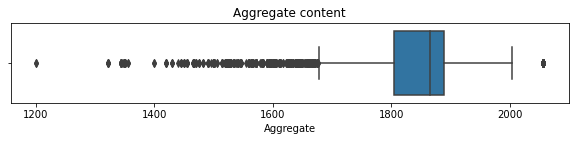

In [70]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Aggregate content")
sns.boxplot(x=df_correction['Aggregate'])
plt.show()

[Go back to table of contents](#0)

### 4.6. Fine aggregate <a id=11></a>

In [71]:
df_correction['Fine_aggregate'].describe(include=all)

count   5336.00
mean     705.94
std      100.68
min      275.00
25%      660.83
50%      715.00
75%      765.00
max     1193.00
Name: Fine_aggregate, dtype: float64

<AxesSubplot:xlabel='Fine_aggregate', ylabel='Count'>

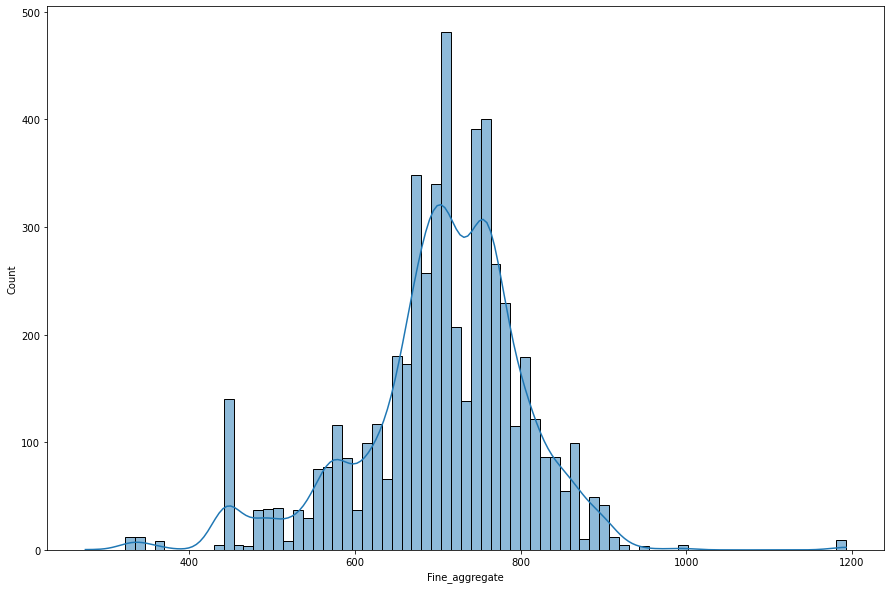

In [72]:
plt.figure(figsize= (15,10))
sns.histplot(df_correction['Fine_aggregate'],kde=True)

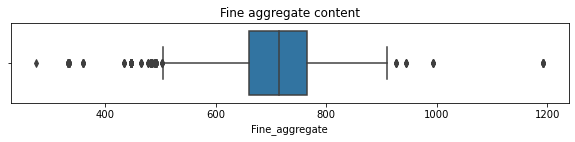

In [73]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Fine aggregate content")
sns.boxplot(x=df_correction['Fine_aggregate'])
plt.show()

[Go back to table of contents](#0)

### 4.7. Coarse aggregate <a id=12></a>

In [74]:
df_correction['Coarse_aggregate'].describe(include=all)

count   5336.00
mean    1120.98
std      127.18
min      468.00
25%     1055.90
50%     1145.00
75%     1190.00
max     1510.00
Name: Coarse_aggregate, dtype: float64

<AxesSubplot:xlabel='Coarse_aggregate', ylabel='Count'>

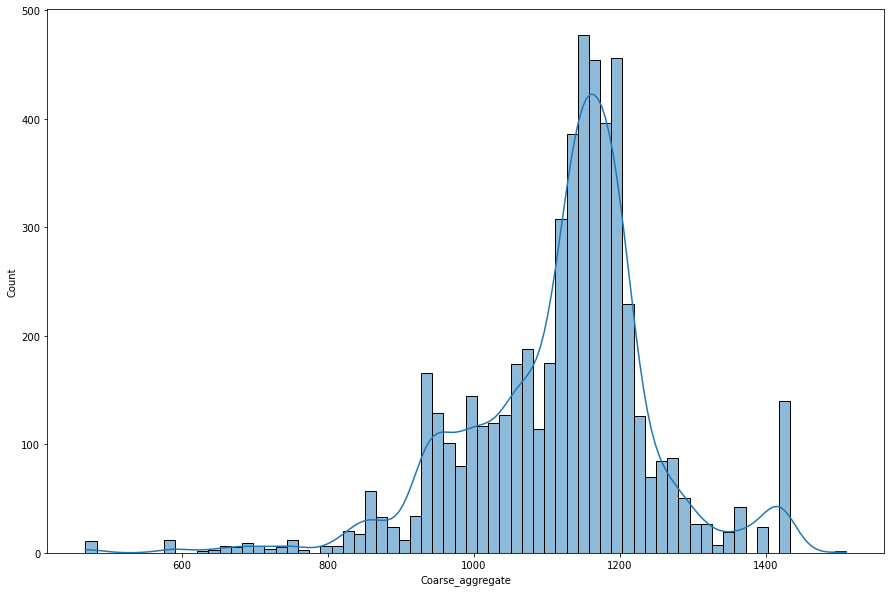

In [75]:
plt.figure(figsize= (15,10))
sns.histplot(df_correction['Coarse_aggregate'],kde=True)

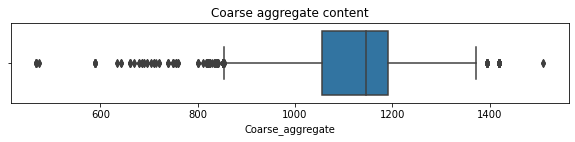

In [76]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Coarse aggregate content")
sns.boxplot(x=df_correction['Coarse_aggregate'])
plt.show()

[Go back to table of contents](#0)

### 4.8. Slag <a id=13></a>

Due to insufficient data, slag was left out in EDA.

[Go back to table of contents](#0)

### 4.9. Filler <a id=14></a>

In [77]:
df_correction['Filler'].describe(include=all)

count   5336.00
mean      17.41
std       37.25
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      174.74
Name: Filler, dtype: float64

<AxesSubplot:xlabel='Filler', ylabel='Count'>

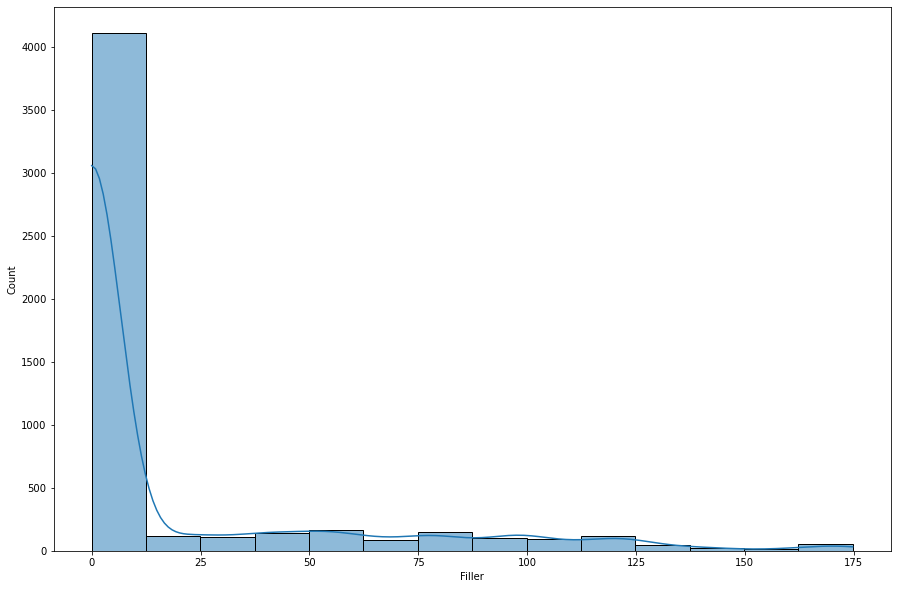

In [78]:
plt.figure(figsize= (15,10))
sns.histplot(df_correction['Filler'],kde=True)

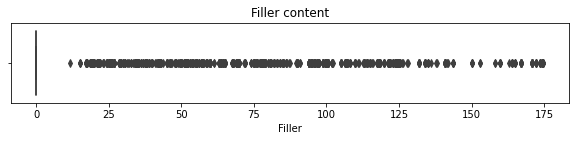

In [79]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Filler content")
sns.boxplot(x=df_correction['Filler'])
plt.show()

Due to insufficient data, filler will not be considered during building ML model.

[Go back to table of contents](#0)

### 4.10. Compressive strength <a id=15></a>

In [80]:
df_correction['Compr_str'].describe(include=all)

count   5336.00
mean      40.49
std       14.02
min        2.35
25%       32.03
50%       38.65
75%       46.29
max      114.14
Name: Compr_str, dtype: float64

<AxesSubplot:xlabel='Compr_str', ylabel='Count'>

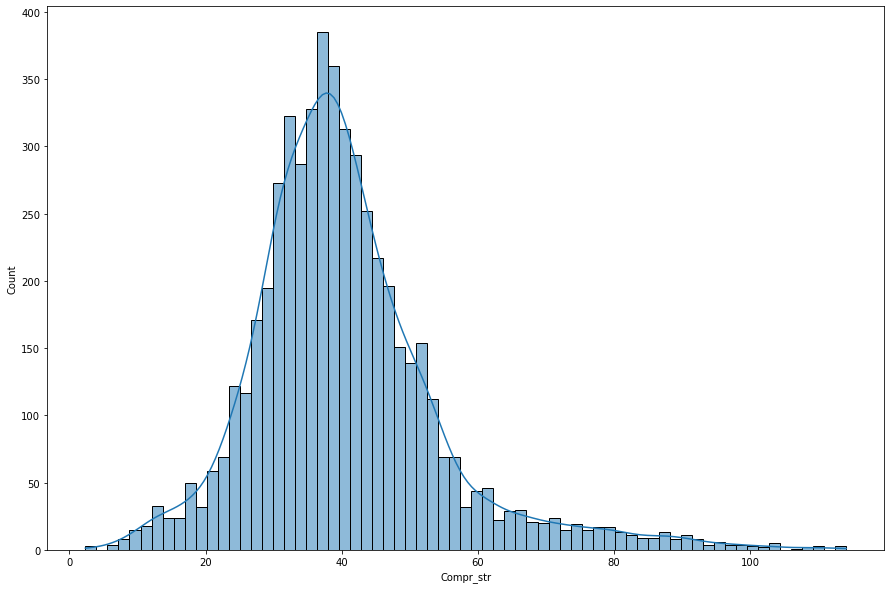

In [81]:
plt.figure(figsize= (15,10))
sns.histplot(df_correction['Compr_str'],kde=True)

From the perspective of compressive strength analysis, the outliers are very interesting. Some of them may result from imperfections in the measurement devices. However, the vast majority of outliers are due to the complexity of the concrete binding and maintenance process during its binding. It is necessary to deepen the analysis of compressive strength and attempt to identify samples that have achieved very high and very low values. Before conducting this analysis, it is necessary to check the frequency of occurrence of individual values.

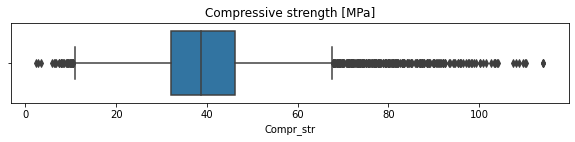

In [82]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Compressive strength [MPa]")
sns.boxplot(x=df_correction['Compr_str'])
plt.show()

In [83]:
IQR_calc(df_correction,"Compr_str")

IQR value for column Compr_str is: 14.253999999999998
Q3 value for column Compr_str is: 46.288
Q1 value for column Compr_str is: 32.034
Lower range is 10.653000000000002, upper range is 67.669


The average characteristic strength in the analyzed dataset was 40.49 MPa. The median has a value of 38.65 MPa. The minimum value of the attribute is 2.35 MPa, and the maximum is 114.14 MPa. The standard deviation is 14.02 MPa. The distribution is right skewed. Outlier analysis began with samples that had low compressive strength (below 10 MPa).

Let's check low and high values of CS (under and upper range).

In [84]:
low_values = df_correction

In [88]:
df_correction.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,5336.00,5336.00,5336.00,5336.00,5336.00,5336.00,5336.00,5336.00,5336.00,5336.00,5336.00
mean,360.49,0.51,178.13,3.57,1826.92,705.94,1120.98,9.01,17.41,40.49,24.73
std,57.73,0.11,18.47,5.08,106.36,100.68,127.18,37.90,37.25,14.02,41.04
min,165.00,0.24,110.00,0.00,1200.00,275.00,468.00,0.00,0.00,2.35,1.00
25%,350.00,0.46,165.60,0.00,1805.00,660.83,1055.90,0.00,0.00,32.03,7.00
50%,364.00,0.49,178.50,3.00,1865.00,715.00,1145.00,0.00,0.00,38.65,7.00
75%,375.00,0.53,189.00,4.23,1890.00,765.00,1190.00,0.00,0.00,46.29,28.00
max,600.00,1.00,240.00,72.60,2057.13,1193.00,1510.00,359.40,174.74,114.14,365.00


In [86]:
low_values_10 = low_values[low_values["Compr_str"]<=10]

In [87]:
low_values_10.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,250.99,0.79,190.32,1.66,1790.34,805.18,985.16,41.64,41.12,7.59,3.42
std,62.64,0.16,21.63,3.47,93.50,99.94,80.29,77.43,54.73,2.18,2.04
min,167.95,0.48,121.75,0.00,1572.00,464.00,854.00,0.00,0.00,2.35,1.00
25%,199.65,0.71,184.42,0.00,1737.25,776.16,943.42,0.00,0.00,6.72,3.00
50%,243.00,0.80,192.00,0.00,1819.30,834.75,969.50,0.00,0.00,7.92,3.00
75%,287.50,0.94,203.50,0.00,1849.03,865.00,1058.88,42.97,86.92,9.23,3.00
max,385.00,1.00,228.00,10.83,1970.00,945.00,1125.00,305.30,163.83,9.99,7.00


As we can see in tables above, low CS samples also have almost 110 kg cement less than all records in database, more water, much higher w/c indicator and their age is only 3,42 days. All this records are intuitive and are correct. Now let's take a look at higher values of CS.

In [102]:
high_values = df_correction

In [103]:
high_values_68 = high_values

In [104]:
high_values_68 = high_values_68[high_values_68['Compr_str']>=68]

In [106]:
high_values_68.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Slag,Filler,Compr_str,Age
count,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00,255.00
mean,444.60,0.37,160.92,8.16,1696.70,639.99,1056.71,22.05,43.09,81.79,62.51
std,65.77,0.07,14.33,9.74,100.95,102.72,128.77,59.84,39.44,10.63,69.68
min,275.00,0.24,128.00,0.00,1467.00,446.00,822.00,0.00,0.00,68.00,3.00
25%,400.00,0.32,150.90,0.00,1638.75,552.00,980.40,0.00,0.00,73.30,28.00
50%,447.00,0.36,164.90,5.37,1700.50,644.90,1031.60,0.00,42.00,79.50,28.00
75%,495.00,0.42,170.00,11.40,1751.15,720.35,1107.50,0.00,59.90,88.13,90.00
max,600.00,0.60,216.00,58.20,1920.00,896.00,1419.00,282.80,165.00,114.14,365.00


Samples with CS greater than 68 MPa (upper range) have more cement (around 80 kg) than the mean. Their w/c indicator is also lower and much more additives.

Table below shows comparison between high and low CS mixes. 

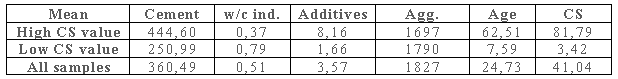

As we can deduce from table above, cement, water, age and additives plays important role in CS. 

[Go back to table of contents](#0)

### 4.11. Sample age  <a id=16></a>

In [89]:
df_correction['Age'].describe(include=all)

count   5336.00
mean      24.73
std       41.04
min        1.00
25%        7.00
50%        7.00
75%       28.00
max      365.00
Name: Age, dtype: float64

In [90]:
df_correction['Age'].value_counts()

7      2618
28     1721
3       245
90      165
14      131
56      120
180      74
1        70
100      48
91       36
21       26
365      24
60       19
270      16
360       9
128       7
150       4
120       3
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

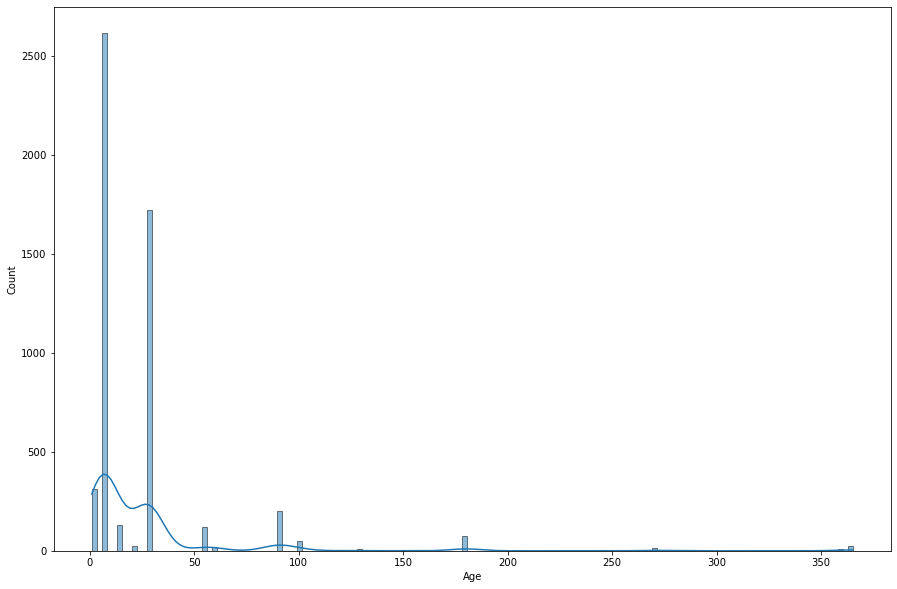

In [94]:
plt.figure(figsize= (15,10))
sns.histplot(df_correction['Age'],kde=True)

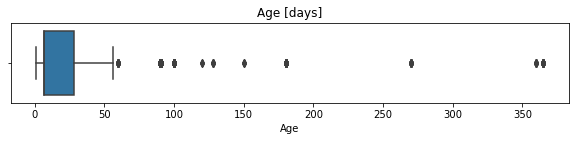

In [95]:
plt.figure(figsize= (10,5))
plt.subplot(3,1,1)
plt.title("Age [days]")
sns.boxplot(x=df_correction['Age'])
plt.show()

The oldes samples was 1 year old. 

In [96]:
IQR_calc(df_correction,"Age")

IQR value for column Age is: 21.0
Q3 value for column Age is: 28.0
Q1 value for column Age is: 7.0
Lower range is -24.5, upper range is 59.5


[Go back to table of contents](#0)

### 4.12. Correlation Matrix <a id=17></a>

The final stage of the data understanding phase in the analyzed dataset is the correlation between attributes. This will allow us to move on to the final data preparation phase - attribute selection and their final integration. To visualize the correlation between individual attributes, a correlation matrix was used.

<AxesSubplot:>

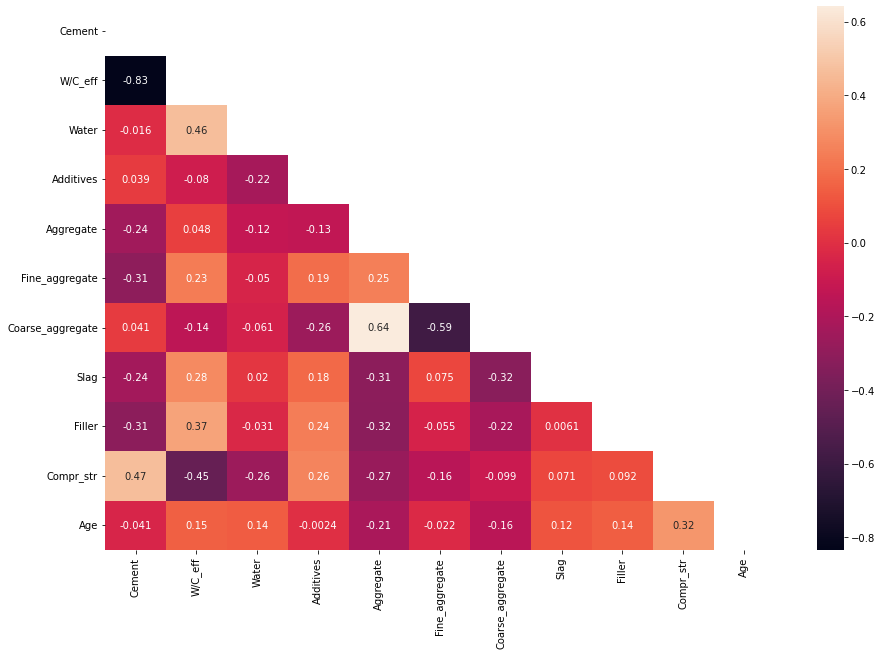

In [97]:
plt.figure(figsize= (15,10))
concrete_corr=df_correction.corr()
mask=np.triu(np.ones_like(concrete_corr,dtype='bool'))
sns.heatmap(concrete_corr,mask=mask,annot=True)

The most significant correlation in the analyzed dataset is the relationship between characteristic strength and the other attributes. Figure above shows that it is strongly positively correlated with cement content, additives, and age. A strong negative correlation is found with the water-cement ratio (and thus with water) and aggregate content. The compressive strength correlation is as expected. The positive correlation with the content of additives results from the fact that most of the additives in the collected data were plasticizers - they can reduce the water content (thus lowering the w/c ratio). The negative correlation between aggregate content and compressive strength is interesting. This is because at high amounts of aggregate, due to the workability of the mixture, it is necessary to limit the amount of cement (the content of cement and aggregate also exhibit a negative correlation).

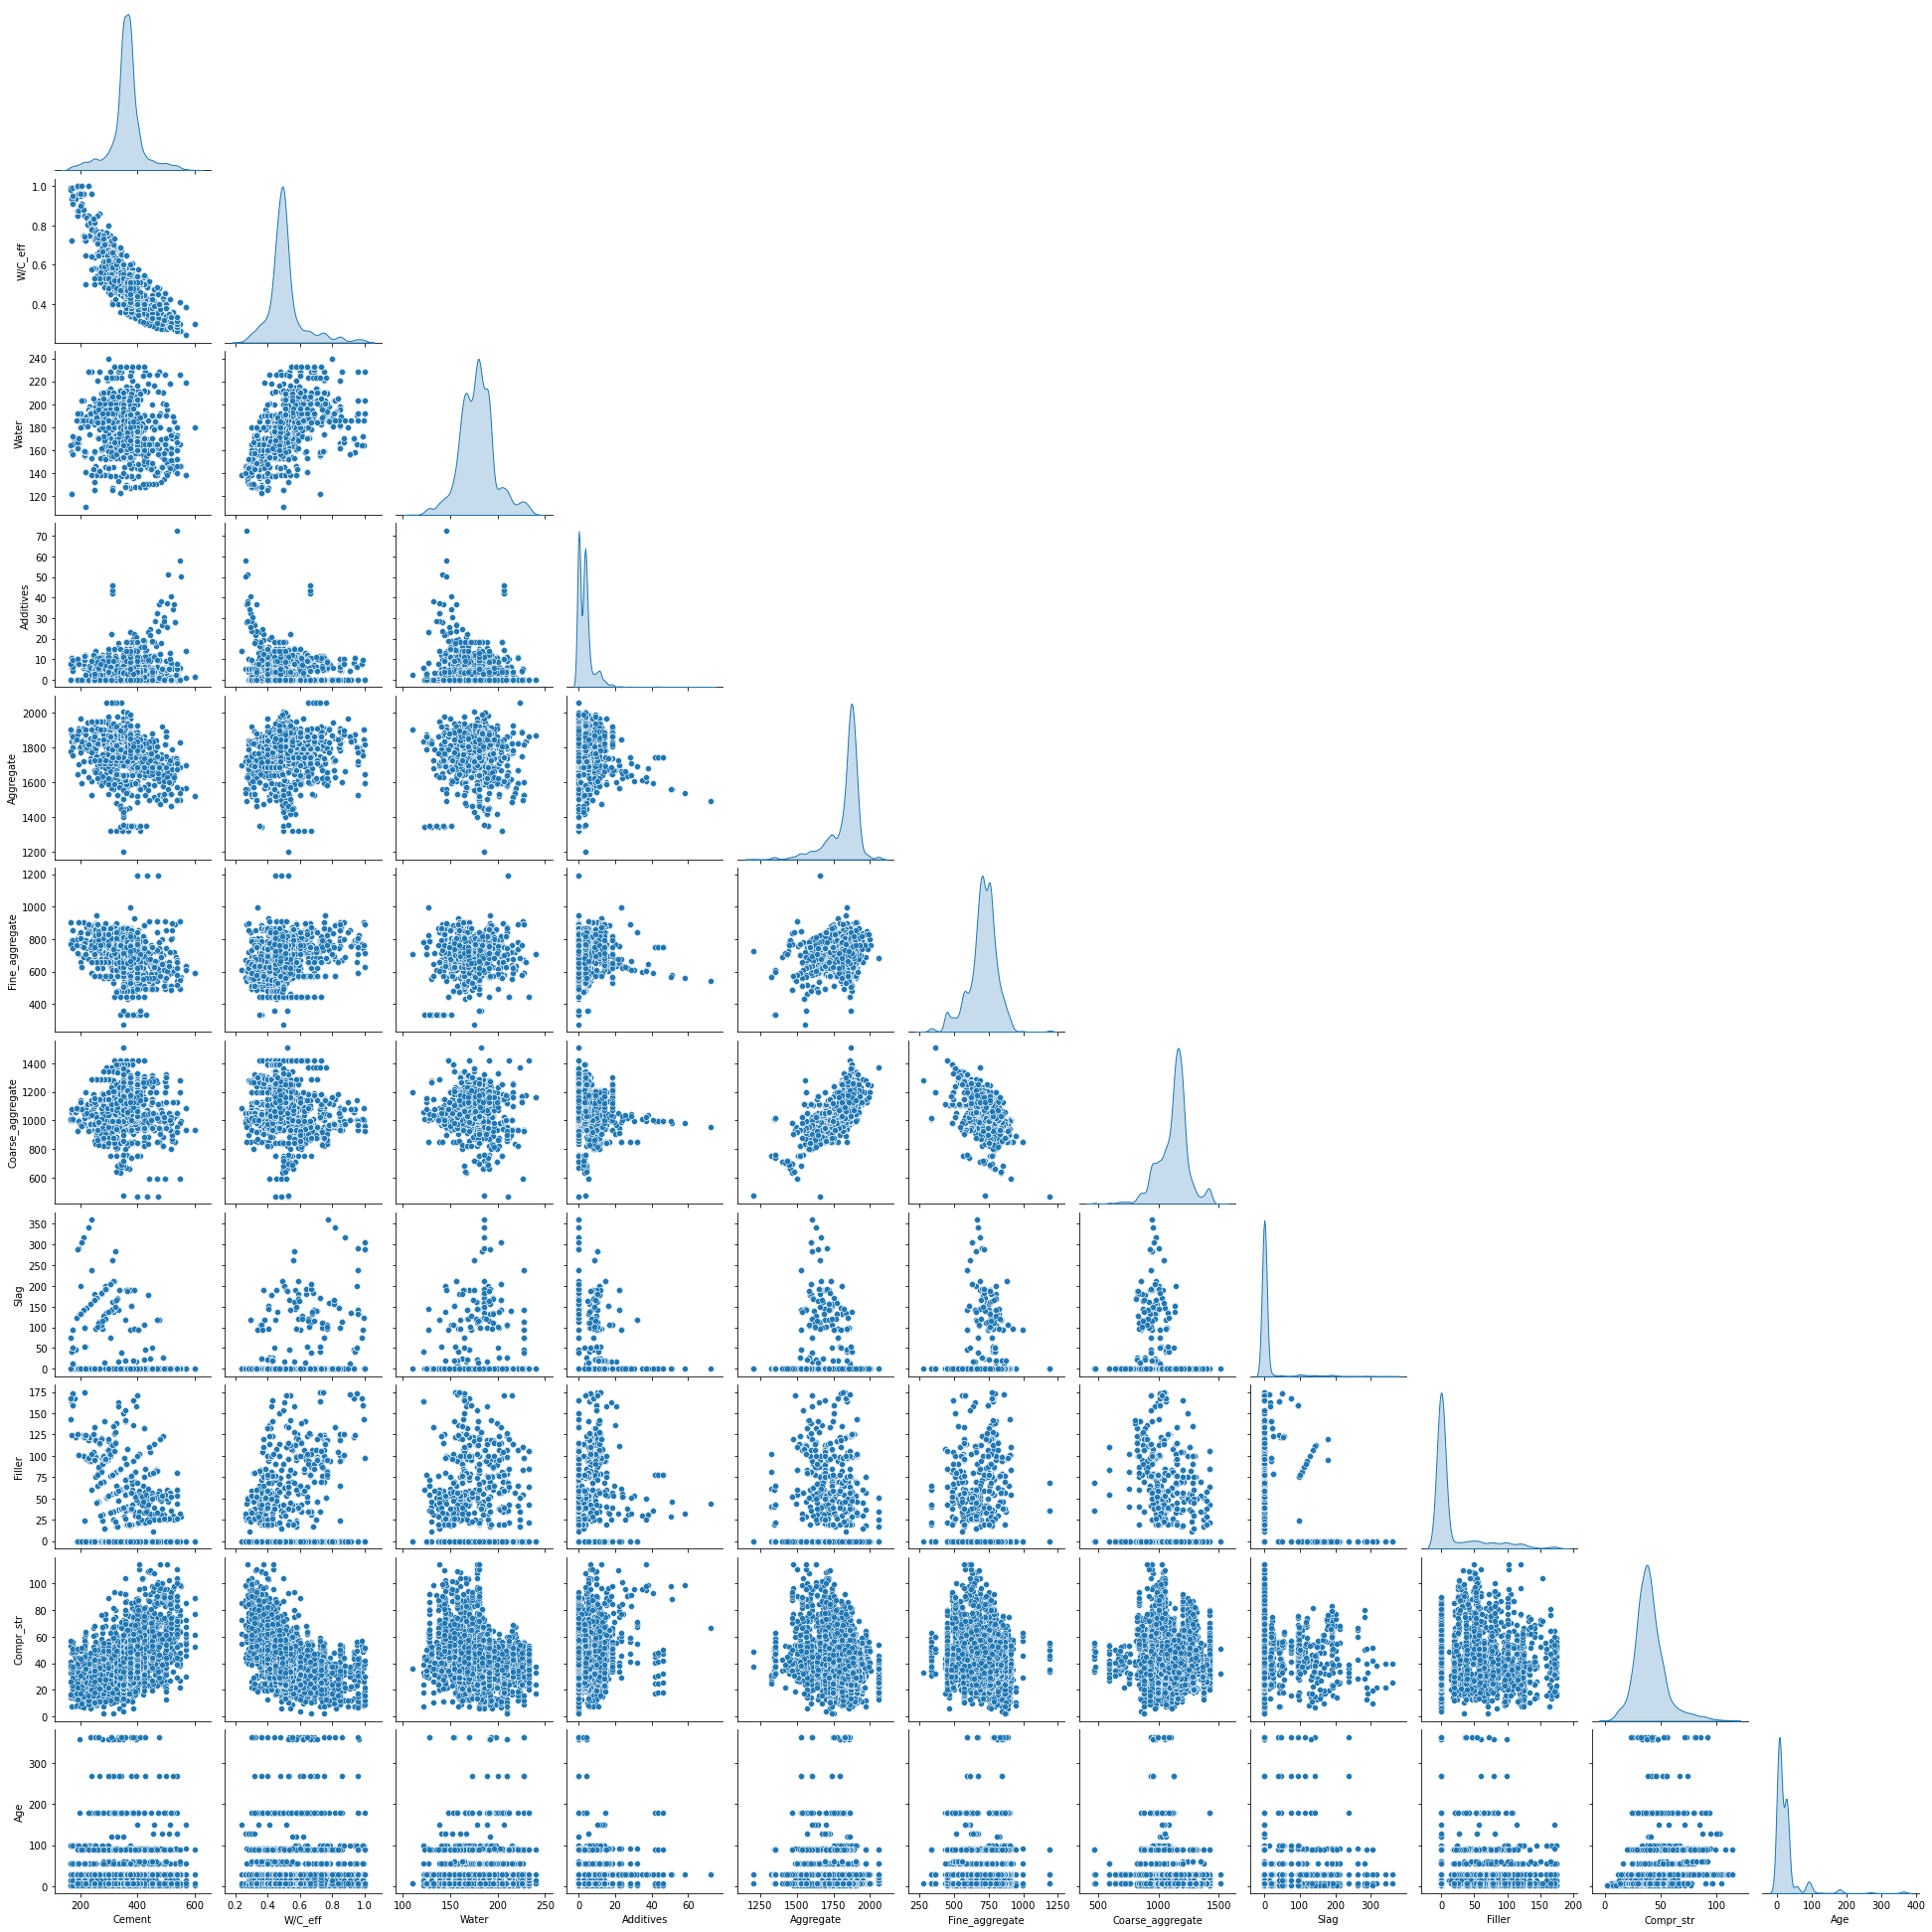

In [98]:
sns.pairplot(df_correction, diag_kind = 'kde', corner = True)

To optimize the selection of attributes for building a machine learning model predicting the compressive strength of concrete based on its composition, it is necessary to examine the influence of the content of individual components on strength. Scatter plots presented in figure above show clear proportionality between cement content and strength - for high strength, cement content is also high. As the w/c ratio increases, there is a sharp drop in sample strength. The relationship between strength and sample age is interesting. It can be stated that a significant portion of the samples achieved very high compressive strength after 28 days. This observation indicates that concrete achieves almost its nominal compressive strength after 28 days. For concrete age up to 7 days, there is a concentration of records at values < 25MPa, while for samples tested after a period longer than 28 days, they achieved strengths from the entire range of values. Analyzing the relationship between compressive strength and aggregate content, a clear optimal range of aggregate content can be observed, which is between 1500-1700 kg/m3. Another interesting observation resulting from the analysis of correlation is a clear decrease in the w/c ratio and an increase in cement content in the mixture as the content of additives increases. This observation reflects and aligns well with the expectations placed on plasticizers. It allows maintaining the workability of the mixture while reducing the amount of water. Unfortunately, in the case of slag and filler content, it is difficult to discern any clear patterns and trends. This is due to the relatively small number of samples in which these attributes occurred. The analysis carried out allowed fthe final selection of attributes for model building.
It was decided that final attributes for building ML Model will be: cement, water, w/c indicator, aggregate, additives, age and compressive strength.

In [100]:
final_df = df_correction

In [101]:
final_df = final_df[[
    'Cement', 'W/C_eff', 'Water', 'Additives', 'Aggregate',
       'Fine_aggregate', 'Coarse_aggregate', 'Compr_str',
       'Age'
                    ]]

In [102]:
final_df.describe()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Compr_str,Age
count,5336.00,5336.00,5336.00,5336.00,5336.00,5336.00,5336.00,5336.00,5336.00
mean,360.49,0.51,178.13,3.57,1826.92,705.94,1120.98,40.49,24.73
std,57.73,0.11,18.47,5.08,106.36,100.68,127.18,14.02,41.04
min,165.00,0.24,110.00,0.00,1200.00,275.00,468.00,2.35,1.00
25%,350.00,0.46,165.60,0.00,1805.00,660.83,1055.90,32.03,7.00
50%,364.00,0.49,178.50,3.00,1865.00,715.00,1145.00,38.65,7.00
75%,375.00,0.53,189.00,4.23,1890.00,765.00,1190.00,46.29,28.00
max,600.00,1.00,240.00,72.60,2057.13,1193.00,1510.00,114.14,365.00


In [103]:
final_df.corr()['Compr_str'].sort_values()[:-1]

W/C_eff            -0.45
Aggregate          -0.27
Water              -0.26
Fine_aggregate     -0.16
Coarse_aggregate   -0.10
Additives           0.26
Age                 0.32
Cement              0.47
Name: Compr_str, dtype: float64

[Go back to table of contents](#0)

## 5. Building model <a id=29></a>

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [105]:
X = final_df.drop('Compr_str', axis=1)
y = final_df['Compr_str']

In [106]:
X.head()

,Cement,W/C_eff,Water,Additives,Aggregate,Fine_aggregate,Coarse_aggregate,Age
0,540.00,0.30,162.00,2.50,1716.00,676.00,1040.00,28
1,540.00,0.30,162.00,2.50,1731.00,676.00,1055.00,28
2,332.50,0.69,228.00,0.00,1526.00,594.00,932.00,270
3,332.50,0.69,228.00,0.00,1526.00,594.00,932.00,365
4,198.60,0.97,192.00,0.00,1803.90,825.50,978.40,360


In [107]:
y.head()

0   79.99
1   61.89
2   40.27
3   41.05
4   44.30
Name: Compr_str, dtype: float64

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 7)

In [109]:
print(f'X_train shape : ({X_train.shape[0]},{X_train.shape[1]})')
print(f'y_train shape : ({y_train.shape[0]})')
print(f'X_test shape : ({X_test.shape[0]},{X_test.shape[1]})')
print(f'y_test shape : ({y_test.shape[0]})')

X_train shape : (3735,8)
y_train shape : (3735)
X_test shape : (1601,8)
y_test shape : (1601)


In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lr_model = LinearRegression()

In [112]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [113]:
lr_model.coef_

array([ 1.50178440e-01,  2.62987160e+01, -2.80655126e-01,  4.54823661e-01,
       -9.63724655e-03, -7.93408517e-03, -1.70316137e-03,  1.25092758e-01])

In [114]:
coef_df = pd.DataFrame(data=lr_model.coef_,index=X.columns,columns=['coef'])

In [115]:
coef_df

,coef
Cement,0.15
W/C_eff,26.30
Water,-0.28
Additives,0.45
Aggregate,-0.01
Fine_aggregate,-0.01
Coarse_aggregate,-0.00
Age,0.13


In [116]:
prediction = lr_model.predict(X_test)

Text(0, 0.5, 'y_test')

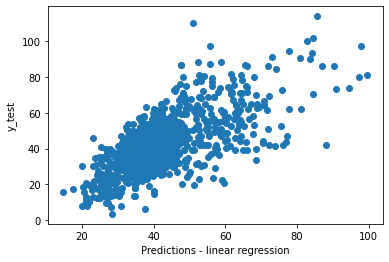

In [117]:
plt.scatter(x=prediction,y=y_test)

plt.xlabel('Predictions - linear regression')

plt.ylabel('y_test')

In [118]:
from sklearn.metrics import mean_squared_error,r2_score

In [119]:
print('RMSE',np.sqrt(mean_squared_error(y_test,prediction)))
print('R squared',r2_score(y_test,prediction))

RMSE 9.88320092525232
R squared 0.4668921600202982


Simple linear regression is not enough. Let's try more complex model - Ridge Regression

In [120]:
from sklearn.linear_model import Ridge

In [121]:
ridge = Ridge().fit(X_train, y_train)

In [122]:
ridge.coef_

array([ 1.41600736e-01,  2.10321801e+01, -2.66410730e-01,  4.58621121e-01,
       -9.97245148e-03, -8.06410049e-03, -1.90835087e-03,  1.25612217e-01])

In [123]:
coef_df = pd.DataFrame(data=ridge.coef_,index=X.columns,columns=['coef'])

In [124]:
coef_df

,coef
Cement,0.14
W/C_eff,21.03
Water,-0.27
Additives,0.46
Aggregate,-0.01
Fine_aggregate,-0.01
Coarse_aggregate,-0.00
Age,0.13


In [125]:
prediction = ridge.predict(X_test)

Text(0, 0.5, 'y_test')

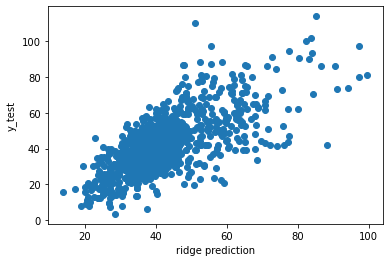

In [126]:
plt.scatter(x=prediction,y=y_test)

plt.xlabel('ridge prediction')

plt.ylabel('y_test')

In [127]:
print('RMSE',np.sqrt(mean_squared_error(y_test,prediction)))
print('R squared',r2_score(y_test,prediction))

RMSE 9.878287346745491
R squared 0.46742211303670445


Ridge regression is also not enough for analyzed dataset. Let's try other model - lasso

In [128]:
from sklearn.linear_model import Lasso

In [129]:
lasso = Lasso().fit(X_train, y_train)

In [130]:
lasso.coef_

array([ 0.10731327,  0.        , -0.20869269,  0.43596752, -0.01441113,
       -0.00530233,  0.        ,  0.1268483 ])

In [131]:
coef_df = pd.DataFrame(data=lasso.coef_,index=X.columns,columns=['coef'])

In [132]:
coef_df

,coef
Cement,0.11
W/C_eff,0.00
Water,-0.21
Additives,0.44
Aggregate,-0.01
Fine_aggregate,-0.01
Coarse_aggregate,0.00
Age,0.13


In [133]:
prediction = lasso.predict(X_test)

Text(0, 0.5, 'y_test')

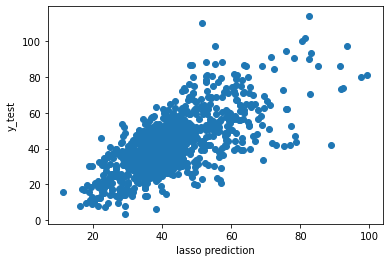

In [134]:
plt.scatter(x=prediction,y=y_test)

plt.xlabel('lasso prediction')

plt.ylabel('y_test')

In [135]:
print('RMSE',np.sqrt(mean_squared_error(y_test,prediction)))
print('R squared',r2_score(y_test,prediction))

RMSE 9.89788940246402
R squared 0.4653063658389257


Neither Ridge nor Lasso wasn't enough to build correct model. Let's try to evaluate ML model further by trying random forest.

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
rf=RandomForestRegressor(n_estimators=60,random_state=42)

In [138]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=60, random_state=42)

In [139]:
rf_prediction=rf.predict(X_test)

In [146]:
print(f"Learning set score: {rf.score(X_train, y_train):.3f}")
print(f"Test set score: {rf.score(X_test, y_test):.3f}")
print('RMSE',np.sqrt(mean_squared_error(y_test,rf_prediction)))

Learning set score: 0.969
Test set score: 0.844
RMSE 5.35301357886055


Model is overfitted.

Text(0, 0.5, 'y_test')

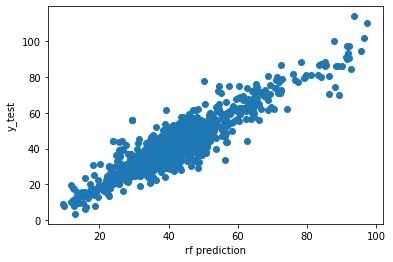

In [143]:

plt.scatter(rf_prediction,y_test)


plt.xlabel('rf prediction')


plt.ylabel('y_test')

In [147]:
rf.feature_importances_

array([0.04829342, 0.38081162, 0.04254138, 0.07067261, 0.0650503 ,
       0.06614458, 0.06188914, 0.26459696])

In [148]:
f_importance=pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['value'])

f_importance

,value
Cement,0.05
W/C_eff,0.38
Water,0.04
Additives,0.07
Aggregate,0.07
Fine_aggregate,0.07
Coarse_aggregate,0.06
Age,0.26


Let's optimize parameters by implementing GridSearchCV method.

In [150]:
# number of trees in random forest
n_estimators=np.arange(50,500,25)
# no of features to consider at every split
max_features=['sqrt','log2']
# minimum no of samples required to split a node
min_samples_split=[2,4]
# mimimum no of samples required at each leaf node
min_samples_leaf=[1,2]
# methode of selecting samples for training eeach tree
bootstrap=[True,False]

In [151]:
param_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "bootstrap":bootstrap}

In [152]:
rf=RandomForestRegressor()

In [153]:
from sklearn.model_selection import GridSearchCV

rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [154]:
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475])},
             verbose=2)

In [155]:
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [156]:
rf=RandomForestRegressor(bootstrap= False,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split=2,
 n_estimators=150)

In [157]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=150)

In [158]:
pred=rf.predict(X_test)

In [172]:
print('R squared value on train data =',rf.score(X_train,y_train))
print('R squared value on test data =',rf.score(X_test,y_test))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

R squared value on train data = 0.9894615574707298
R squared value on test data = 0.8483889023462684
RMSE 5.270545731439571


GridSearchCV is a hyperparameter tuning method in machine learning. It involves searching a grid of different hyperparameter values to find the best set that maximizes the model's performance. In practice, it is a machine learning procedure that involves testing all possible combinations of hyperparameters to find the best sets of values. This method allows for automatic and systematic exploration of different hyperparameter combinations, thus achieving better model performance, improving its predictive capabilities, and optimization. After applying this method, a set of optimal parameters was obtained, which was then used to build a random forest with new parameters.

Let's try gradient boosting. Gradient of a function is the vector whose direction coincides with the direction in which the function changes the fastest, and whose direction indicates the direction in which the function increases. Moving in the opposite direction to the gradient, we will find ourselves in the local minima of the function. The CatBoostRegressor gradient regression model available in the catboost library was used to build the model. This is a gradient regression model based on gradient boosting technology. Gradient boosting is an ensemble algorithm that uses many simple algorithms (e.g. decision trees) to optimize the model. The algorithm automatically adjusts the learning process and can handle large amounts of data and regression problems that have many features or features with low correlation.

In [161]:
!pip install catboost

In [162]:
from catboost import CatBoostRegressor

In [163]:
model = CatBoostRegressor(iterations=10000, verbose=0)
model.fit(X_train,y_train, eval_set=[(X_test,y_test)],early_stopping_rounds=50)

In [164]:
y_preds = model.predict(X_test)

In [165]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [166]:
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

In [167]:
print(f'mean absolute error: {mae}')
print(f'Mean squared error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

mean absolute error: 3.214741253827548
Mean squared error: 20.177850750409974
Root Mean Squared Error: 4.491976263339998
R2 Score: 0.8898727675219016


In [168]:
print('R squared value on train data =',model.score(X_train,y_train))
print('R squared value on test data =',model.score(X_test,y_test))

R squared value on train data = 0.9605676094243433
R squared value on test data = 0.8898727675219016


In [169]:
feat_impt = pd.DataFrame(model.feature_importances_, index=X.columns)

In [170]:
feat_impt

,0
Cement,11.80
W/C_eff,15.14
Water,9.55
Additives,9.40
Aggregate,10.75
Fine_aggregate,9.05
Coarse_aggregate,8.56
Age,25.74


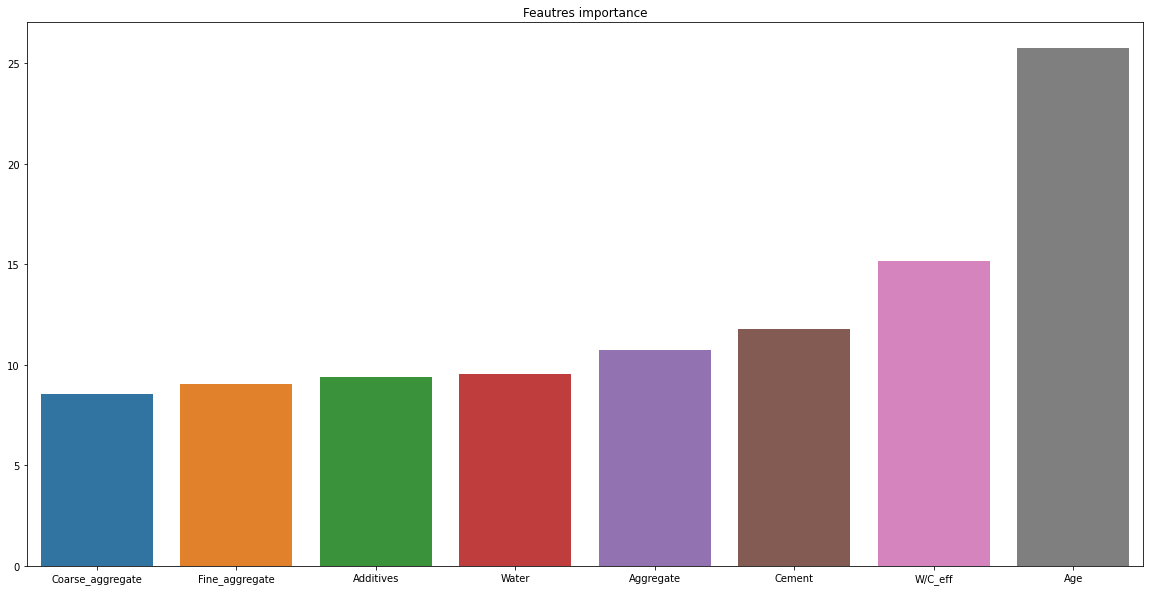

In [171]:
plt.figure(figsize=(20,10))
plt.title('Feautres importance')
sns.barplot(data= feat_impt.sort_values(0).T);

## CONCLUSIONS <a id=30></a>

The linear and ridge regression models proved to be too simple for the analyzed dataset. Their effectiveness on both training and testing data was below 50%. In order to improve the model's effectiveness, further evaluation was carried out. To this end, a random forest model was built. It improved the effectiveness on both training and test data. After applying hyperparameter tuning, the model's effectiveness on the testing data was increased even more. The model evaluation was completed with the gradient regression model. Its effectiveness on the testing data was close to 90%, while for the training data it was 96%. A model with such effectiveness can support concrete mix designers in selecting a more accurate composition of concrete, allowing producers to reduce its production costs - by having the appropriate database and using a machine learning model, the number of samples destroyed during testing the strength of obtained concrete can be reduced - in practice, such testing would only serve to confirm the model's predictions. Additionally, thanks to the application of machine learning, it is possible to plan the delivery of components for concrete production almost in real time. By introducing customer requirements for the strength and properties of concrete in the manufactures, the predicted mixture composition with the quantity of individual components can be returned almost immediately. Such models enable the construction of concrete manufactures supported by AI. This will reduce costs and allow to better plan supply chains, identify critical components and activities in the production process. It can also optimize the entire production process. As the available database grows and samples are destroyed during testing, the model's predictions would become more accurate and the model would better fit the local properties of components - aggregates, cements, and even the quality of water differ to some extent in certain properties. A model trained on local components would achieve much higher effectiveness than standard approaches to concrete design.
The dynamic development of information technology and artificial intelligence allows for the application of innovative approaches in various fields of science, art, production, and daily life. It enables the automation of tedious processes, the discovery of interesting patterns in completely unknown data and the creation of autonomous vehicles. The use of AI in the construction industry optimize risk management on the construction site (through the use of computer vision), cost and provides support for engineers by implementing natural language into the actual projects - simple and repetitive elements can be designed by AI (such as walls, windows, and doors, etc.). Currently, in the construction industry, there is a necessary need to analyze massive data sets (Big Data) generated in the process of BIM (Building Information Modeling), especially in matters of cost management on the construction site. Powerful data repositories are collected in cloud environments and processed by designers, managers, and project managers. The use of AI algorithms allows for the discovery of connections, improvement of analysis and thus optimization of the entire process of implementing a construction project.

[Go back to table of contents](#0)